In [1]:


# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
from sklearn.model_selection import train_test_split

house_train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
X_train = house_train.drop("SalePrice", axis=1)
y_train = house_train["SalePrice"]
X_test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

# Data Overview

In [3]:
X_train.shape

(1460, 80)

In [4]:
X_train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [5]:
X_train = X_train.drop(["Id"], axis=1)
X_test = X_test.drop(["Id"], axis=1)

In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [7]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [8]:
X_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


In [9]:
# attributes_typemod = ["MSSubClass"] # , "OverallQual", "OverallCond"
# X_train[attributes_typemod] = X_train[attributes_typemod].astype("object")
# X_test[attributes_typemod] = X_test[attributes_typemod].astype("object")

class_identifiers = X_train["MSSubClass"].unique()
class_identifiers

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40])

In [10]:
X_train[X_train["MSSubClass"]==60].head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
7,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal
11,60,RL,85.0,11924,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,7,2006,New,Partial


# Handling Missing Values

In [11]:
# Handling NA values
# from sklean.neighbors import KNeighborsRegressor

# house_train["LotFrontage"].median()
# knn = KNeighborsRegressor()

noneNA_attribs = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure",
                     "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish",
                     "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]

cat_attribs = X_train.select_dtypes(include=[object]).drop(noneNA_attribs, axis=1).columns
num_attribs = X_train.select_dtypes(include=[np.number]).columns


for attrib in noneNA_attribs:
    X_train[attrib] = X_train[attrib].fillna("none")
    X_test[attrib] = X_test[attrib].fillna("none")
    
for item in class_identifiers:
    sub_df = X_train.loc[X_train["MSSubClass"]]
    for attrib in cat_attribs:
        if not(sub_df[attrib].isnull().values.all()):
            X_train.loc[X_train["MSSubClass"] == item, attrib] = X_train.loc[X_train["MSSubClass"] == item, attrib].fillna(sub_df[attrib].mode()[0])
            X_test.loc[X_test["MSSubClass"] == item, attrib] = X_test.loc[X_test["MSSubClass"] == item, attrib].fillna(sub_df[attrib].mode()[0])
        else:
            X_train[attrib] = X_train[attrib].fillna(X_train[attrib].mode()[0])
            X_test[attrib] = X_test[attrib].fillna(X_train[attrib].mode()[0])
    for attrib in num_attribs:
        if not(sub_df[attrib].isnull().values.all()):
            X_train.loc[X_train["MSSubClass"] == item, attrib] = X_train.loc[X_train["MSSubClass"] == item, attrib].fillna(sub_df[attrib].median())
            X_test.loc[X_test["MSSubClass"] == item, attrib] = X_test.loc[X_test["MSSubClass"] == item, attrib].fillna(sub_df[attrib].median())
        else:
            X_train[attrib] = X_train[attrib].fillna(X_train[attrib].median())
            X_test[attrib] = X_test[attrib].fillna(X_train[attrib].median())
            
            
            
            
# EThe extra FOR loops are implemented to catch any outstanding null values 
for attrib in cat_attribs:    
    X_train[attrib] = X_train[attrib].fillna(X_train[attrib].mode()[0])
    X_test[attrib] = X_test[attrib].fillna(X_train[attrib].mode()[0])
    
for attrib in num_attribs:
    X_train[attrib] = X_train[attrib].fillna(X_train[attrib].median())
    X_test[attrib] = X_test[attrib].fillna(X_train[attrib].median())
    
    
X_train = X_train.drop("MSSubClass", axis=1)
X_test = X_test.drop("MSSubClass", axis=1)
num_attribs = np.delete(num_attribs, 0) # remove "MSSubClass"

In [12]:
print(X_train.isnull().sum().sum())
print(X_test.isnull().sum().sum())

0
0


# Feature Engineering

## Handling Skewed Features

In [13]:
from scipy import stats

In [14]:
stats.skew(X_train.select_dtypes(np.number))

array([ 1.32436383, 12.19514213,  0.21672098,  0.69235521, -0.61283072,
       -0.5030445 ,  2.67486469,  1.6837709 ,  4.25088802,  0.9193227 ,
        1.52268809,  1.37534174,  0.81219427,  9.00208042,  1.36515595,
        0.59545404,  4.09918567,  0.03652398,  0.67520283,  0.21157244,
        4.48378409,  0.67564577,  0.64889763, -0.7185523 , -0.3421969 ,
        0.17979594,  1.5397917 ,  2.36191193,  3.08669647, 10.29375236,
        4.11797738, 14.81313466, 24.45163962,  0.21183506,  0.09616958])

In [15]:
# stats.skew(house_train["LotFrontage"])
stats.skew(X_test.select_dtypes(np.number))

array([ 0.22189586,  3.11201294,  0.18100968,  0.44870295, -0.58705226,
       -0.39949473,  2.54694662,  1.16553249,  4.03879615,  0.91899831,
        0.81246848,  1.55659213,  0.91194383, 16.1506277 ,  1.12923991,
        0.65119483,  3.77908539,  0.2955344 ,  0.71399253,  0.43617426,
        4.07486014,  0.84173092,  0.81901513, -0.2565494 , -0.10765932,
        0.29905824,  2.12856869,  2.68501475,  4.66437056, 12.51133608,
        3.78434857, 20.17611721, 20.05454313,  0.18283409,  0.1688125 ])

In [16]:
skew_df = pd.DataFrame(num_attribs, columns=["Feature"])
skew_df["Skew"] = skew_df["Feature"].apply(lambda feature: stats.skew(X_train[feature]))
skew_df["AbsSkew"] = skew_df["Skew"].apply(abs)
skew_df["Skewed"] = skew_df["AbsSkew"].apply(lambda x: True if x>= 0.5 else False)
skew_df

,Feature,Skew,AbsSkew,Skewed
0,LotFrontage,1.324364,1.324364,True
1,LotArea,12.195142,12.195142,True
2,OverallQual,0.216721,0.216721,False
3,OverallCond,0.692355,0.692355,True
4,YearBuilt,-0.612831,0.612831,True
5,YearRemodAdd,-0.503044,0.503044,True
6,MasVnrArea,2.674865,2.674865,True
7,BsmtFinSF1,1.683771,1.683771,True
8,BsmtFinSF2,4.250888,4.250888,True
9,BsmtUnfSF,0.919323,0.919323,True


In [17]:
X_train[num_attribs].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1460 non-null   float64
 1   LotArea        1460 non-null   int64  
 2   OverallQual    1460 non-null   int64  
 3   OverallCond    1460 non-null   int64  
 4   YearBuilt      1460 non-null   int64  
 5   YearRemodAdd   1460 non-null   int64  
 6   MasVnrArea     1460 non-null   float64
 7   BsmtFinSF1     1460 non-null   int64  
 8   BsmtFinSF2     1460 non-null   int64  
 9   BsmtUnfSF      1460 non-null   int64  
 10  TotalBsmtSF    1460 non-null   int64  
 11  1stFlrSF       1460 non-null   int64  
 12  2ndFlrSF       1460 non-null   int64  
 13  LowQualFinSF   1460 non-null   int64  
 14  GrLivArea      1460 non-null   int64  
 15  BsmtFullBath   1460 non-null   int64  
 16  BsmtHalfBath   1460 non-null   int64  
 17  FullBath       1460 non-null   int64  
 18  HalfBath

In [18]:
skew_df.query("Skewed == True")["Feature"]

0       LotFrontage
1           LotArea
3       OverallCond
4         YearBuilt
5      YearRemodAdd
6        MasVnrArea
7        BsmtFinSF1
8        BsmtFinSF2
9         BsmtUnfSF
10      TotalBsmtSF
11         1stFlrSF
12         2ndFlrSF
13     LowQualFinSF
14        GrLivArea
15     BsmtFullBath
16     BsmtHalfBath
18         HalfBath
20     KitchenAbvGr
21     TotRmsAbvGrd
22       Fireplaces
23      GarageYrBlt
26       WoodDeckSF
27      OpenPorchSF
28    EnclosedPorch
29        3SsnPorch
30      ScreenPorch
31         PoolArea
32          MiscVal
Name: Feature, dtype: object

In [19]:
skew_df.query("Skewed == True")["Feature"].values

array(['LotFrontage', 'LotArea', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal'], dtype=object)

In [20]:
X_train[skew_df.query("Skewed == True")["Feature"].values]

,LotFrontage,LotArea,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,65.0,8450,5,2003,2003,196.0,706,0,150,856,...,8,0,2003.0,0,61,0,0,0,0,0
1,80.0,9600,8,1976,1976,0.0,978,0,284,1262,...,6,1,1976.0,298,0,0,0,0,0,0
2,68.0,11250,5,2001,2002,162.0,486,0,434,920,...,6,1,2001.0,0,42,0,0,0,0,0
3,60.0,9550,5,1915,1970,0.0,216,0,540,756,...,7,1,1998.0,0,35,272,0,0,0,0
4,84.0,14260,5,2000,2000,350.0,655,0,490,1145,...,9,1,2000.0,192,84,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,5,1999,2000,0.0,0,0,953,953,...,7,1,1999.0,0,40,0,0,0,0,0
1456,85.0,13175,6,1978,1988,119.0,790,163,589,1542,...,7,2,1978.0,349,0,0,0,0,0,0
1457,66.0,9042,9,1941,2006,0.0,275,0,877,1152,...,9,2,1941.0,0,60,0,0,0,0,2500
1458,68.0,9717,6,1950,1996,0.0,49,1029,0,1078,...,5,0,1950.0,366,0,112,0,0,0,0


In [21]:
X_train[skew_df.query("Skewed == True")["Feature"].values].describe()

,LotFrontage,LotArea,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,75.363014,10516.828082,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,...,6.517808,0.613014,1979.976027,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041
std,24.820253,9981.264932,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,...,1.625393,0.644666,24.749688,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024
min,21.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,7553.500000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,...,5.000000,0.000000,1962.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,74.000000,9478.500000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,...,6.000000,1.000000,1984.500000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,98.000000,11601.500000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,...,7.000000,1.000000,2003.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,313.000000,215245.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,...,14.000000,3.000000,2010.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000


In [22]:
X_train.head(10)

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,RL,65.0,8450,Pave,none,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,none,none,none,0,2,2008,WD,Normal
1,RL,80.0,9600,Pave,none,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,none,none,none,0,5,2007,WD,Normal
2,RL,68.0,11250,Pave,none,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,none,none,none,0,9,2008,WD,Normal
3,RL,60.0,9550,Pave,none,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,none,none,none,0,2,2006,WD,Abnorml
4,RL,84.0,14260,Pave,none,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,none,none,none,0,12,2008,WD,Normal
5,RL,85.0,14115,Pave,none,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,none,MnPrv,Shed,700,10,2009,WD,Normal
6,RL,75.0,10084,Pave,none,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,none,none,none,0,8,2007,WD,Normal
7,RL,100.0,10382,Pave,none,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,none,none,Shed,350,11,2009,WD,Normal
8,RM,51.0,6120,Pave,none,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,none,none,none,0,4,2008,WD,Abnorml
9,RL,50.0,7420,Pave,none,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,none,none,none,0,1,2008,WD,Normal


In [23]:
for column in skew_df.query("Skewed == True")["Feature"].values:
    X_train[column] = np.log1p(X_train[column])
    X_test[column] = np.log1p(X_test[column])

In [24]:
skew_df = pd.DataFrame(num_attribs, columns=["Feature"])
skew_df["Skew"] = skew_df["Feature"].apply(lambda feature: stats.skew(X_train[feature]))
skew_df["AbsSkew"] = skew_df["Skew"].apply(abs)
skew_df["Skewed"] = skew_df["AbsSkew"].apply(lambda x: True if x>= 0.5 else False)
skew_df

,Feature,Skew,AbsSkew,Skewed
0,LotFrontage,-0.925040,0.925040,True
1,LotArea,-0.137263,0.137263,False
2,OverallQual,0.216721,0.216721,False
3,OverallCond,-0.253754,0.253754,False
4,YearBuilt,-0.640470,0.640470,True
5,YearRemodAdd,-0.510480,0.510480,True
6,MasVnrArea,0.503014,0.503014,True
7,BsmtFinSF1,-0.617774,0.617774,True
8,BsmtFinSF2,2.521100,2.521100,True
9,BsmtUnfSF,-2.184257,2.184257,True


## Cosine Transform for Cyclical Features

In [25]:
X_train["MoSold"].unique()

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6])

In [26]:
X_test["MoSold"].unique()

array([ 6,  3,  1,  4,  5,  2,  7, 10,  8, 11,  9, 12])

In [27]:
# go to desmos.com/calculator and draw the finnction for sin(cx)
# Then, adjust the value of so that there is a full cycle between 0 and 12
# Finally, switch the funnction from sin(cx) to -cos(cx)
# in this case: c=0.5236
-np.cos(0.5236 * X_train["MoSold"])

0      -0.499998
1       0.866028
2      -0.000011
3      -0.499998
4      -1.000000
          ...   
1455    0.499992
1456   -0.499998
1457    0.866028
1458    0.500004
1459    1.000000
Name: MoSold, Length: 1460, dtype: float64

In [28]:
print(np.min(-np.cos(0.5236*X_train["MoSold"])))
print(np.max(-np.cos(0.5236*X_train["MoSold"])))
print()
print(-np.cos(0.5236*1))
print(-np.cos(0.5236*12))
print(-np.cos(0.5236*6))
# This way we can distinguish hot months from clod months

-0.9999999998920606
0.9999999999730151

-0.866024791582939
-0.9999999998920606
0.9999999999730151


In [29]:
X_train["MoSold"] = -np.cos(0.5236 * X_train["MoSold"])

In [30]:
X_test["MoSold"] = -np.cos(0.5236 * X_test["MoSold"])

In [31]:
X_train["MoSold"].head(10)

0   -0.499998
1    0.866028
2   -0.000011
3   -0.499998
4   -1.000000
5   -0.500011
6    0.499992
7   -0.866032
8    0.500004
9   -0.866025
Name: MoSold, dtype: float64

In [32]:
X_test["MoSold"].head(10)

0    1.000000
1    1.000000
2    0.000004
3    1.000000
4   -0.866025
5    0.500004
6    0.000004
7    0.866028
8   -0.499998
9    0.500004
Name: MoSold, dtype: float64

## Encode Categoricals

In [33]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
cat_encoder.handle_unknown = "ignore"

X_train = cat_encoder.fit_transform(X_train)
X_test = cat_encoder.transform(X_test)


## Scaling

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Target Transformation

In [35]:
y_train

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <BarContainer object of 10 artists>)

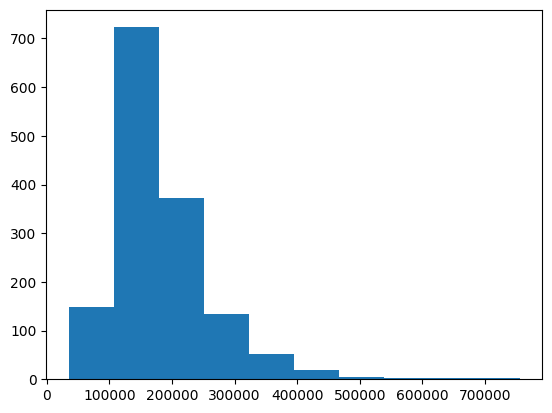

In [36]:
plt.hist(y_train)

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([-1.83870376, -0.93195144, -0.02519913,  0.88155319,  1.78830551,
         2.69505783,  3.60181015,  4.50856246,  5.41531478,  6.3220671 ,
         7.22881942]),
 <BarContainer object of 10 artists>)

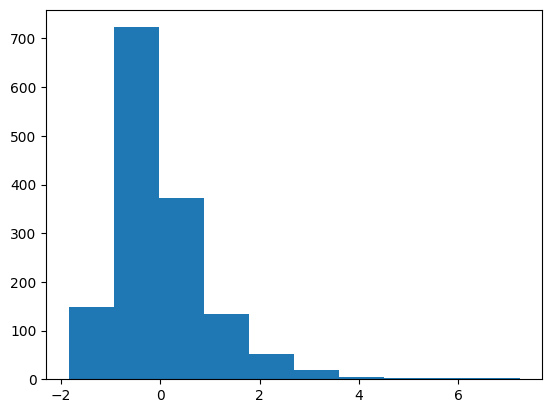

In [37]:
from scipy.stats import zscore

plt.hist(zscore(y_train))

(array([  5.,  12.,  54., 184., 470., 400., 220.,  90.,  19.,   6.]),
 array([10.46027076, 10.76769112, 11.07511148, 11.38253184, 11.6899522 ,
        11.99737256, 12.30479292, 12.61221328, 12.91963363, 13.22705399,
        13.53447435]),
 <BarContainer object of 10 artists>)

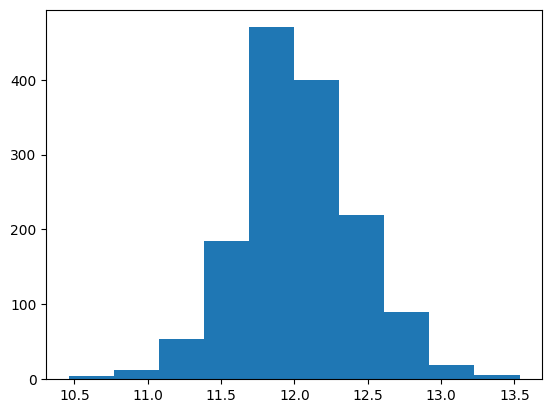

In [38]:
plt.hist(np.log1p(y_train))

/opt/conda/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


(array([  4.,   1.,   4.,  23.,  66., 162., 376., 456., 219.,  25.]),
 array([-5.59853999, -4.82792174, -4.05730348, -3.28668523, -2.51606697,
        -1.74544872, -0.97483046, -0.20421221,  0.56640605,  1.3370243 ,
         2.10764256]),
 <BarContainer object of 10 artists>)

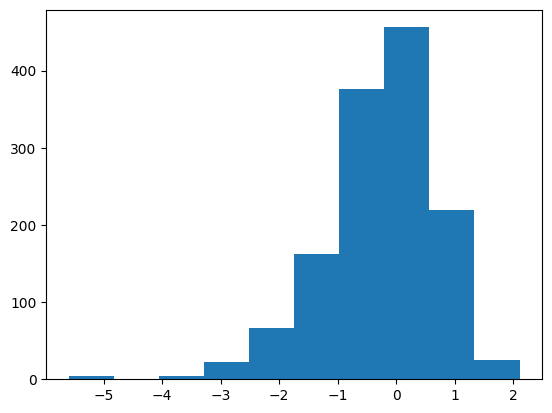

In [39]:
plt.hist(np.log1p(zscore(y_train)))

(array([  5.,  12.,  54., 184., 470., 400., 220.,  90.,  19.,   6.]),
 array([-3.91619802, -3.14632381, -2.3764496 , -1.60657538, -0.83670117,
        -0.06682696,  0.70304725,  1.47292146,  2.24279567,  3.01266988,
         3.78254409]),
 <BarContainer object of 10 artists>)

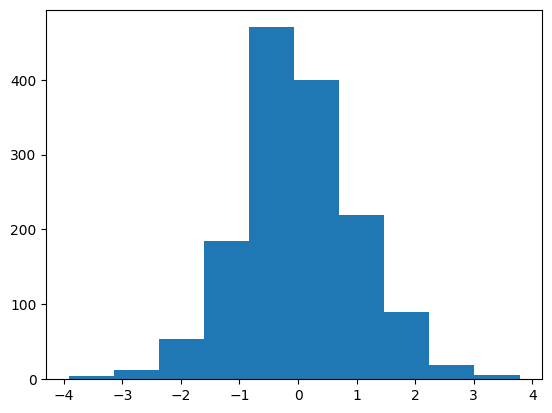

In [40]:
y_temp = zscore(np.log1p(y_train))
plt.hist(y_temp)

In [41]:
y_scaler = StandardScaler()
# y_train = y_scaler.fit_transform(y_train.to_numpy().reshape(-1,1))
y_train = y_scaler.fit_transform(np.log1p(y_train).to_numpy().reshape(-1,1))
print(scaler.scale_)

[0.08247668 0.20624856 0.10410959 ... 0.11623673 0.38373039 0.27979683]


(array([  5.,  12.,  54., 184., 470., 400., 220.,  90.,  19.,   6.]),
 array([-3.91619802, -3.14632381, -2.3764496 , -1.60657538, -0.83670117,
        -0.06682696,  0.70304725,  1.47292146,  2.24279567,  3.01266988,
         3.78254409]),
 <BarContainer object of 10 artists>)

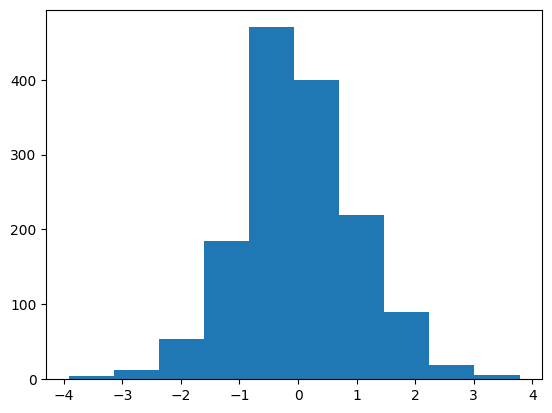

In [42]:
# plt.hist(np.expm1(y_scaler.inverse_transform(y_temp).reshape(-1, 1)))
# y_scaler.inverse_transform(y_temp.reshape(-1, 1))
plt.hist(y_train)
# y_train.shape

In [43]:
np.expm1(y_scaler.inverse_transform(y_train))
# use the method above to transform y_pred

array([[208500.],
       [181500.],
       [223500.],
       ...,
       [266500.],
       [142125.],
       [147500.]])

In [44]:
from sklearn.model_selection import cross_val_score, KFold
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge

kf = KFold(n_splits=10)

baseline_model_1 = CatBoostRegressor(verbose=0)
results1 = cross_val_score(baseline_model_1, X_train, y_train, scoring="neg_mean_squared_error", cv=kf)
print("\nCatBoostRegression:", results1)

baseline_model_2 = LinearRegression()
results2 = cross_val_score(baseline_model_2, X_train, y_train, scoring="neg_mean_squared_error", cv=kf)
print("\nLinearRegression:", results2)

baseline_model_3 = RandomForestRegressor(max_depth=5)
results3 = cross_val_score(baseline_model_3, X_train, y_train.ravel(), scoring="neg_mean_squared_error", cv=kf)
print("RandomForest:", results3)

for a in [10,100,1000,10000]:
    for t in [0.001, 0.01, 0.05, 0.1, 0.25, 0.5]:
        baseline_model = Ridge(alpha=a, tol=t)
        results = cross_val_score(baseline_model, X_train, y_train, scoring="neg_mean_squared_error", cv=kf)
        print("a:", a, "t:", t, results)


CatBoostRegression: [-0.10987576 -0.11236119 -0.12434146 -0.20156201 -0.17907384 -0.1009749
 -0.13766326 -0.09717013 -0.12273444 -0.14187242]

LinearRegression: [-0.18632859 -0.22413938 -0.25307337 -0.31211897 -0.32014265 -0.1940334
 -0.20772349 -0.16454893 -0.266442   -0.21904372]
RandomForest: [-0.2241053  -0.18297057 -0.29120259 -0.29299978 -0.3550906  -0.22233088
 -0.25423571 -0.26247481 -0.23323718 -0.26195515]
a: 10 t: 0.001 [-0.18420849 -0.21924789 -0.24938241 -0.30542041 -0.3177581  -0.18663774
 -0.204246   -0.15994342 -0.25839708 -0.21589167]
a: 10 t: 0.01 [-0.18469007 -0.22027937 -0.24944223 -0.30383479 -0.31788557 -0.18754735
 -0.20429813 -0.15875967 -0.25902375 -0.21423087]
a: 10 t: 0.05 [-0.18441364 -0.21335982 -0.24718734 -0.30410991 -0.31496955 -0.17945939
 -0.20337479 -0.15540825 -0.25435163 -0.21631867]
a: 10 t: 0.1 [-0.18565005 -0.21455865 -0.24425667 -0.30293334 -0.31826813 -0.18001419
 -0.20672508 -0.15663033 -0.25627347 -0.2162862 ]
a: 10 t: 0.25 [-0.18814819 -0.2

In [45]:
cbr = CatBoostRegressor()
cbr.fit(X_train, y_train, silent=True)

In [46]:
y_pred_scaled = cbr.predict(X_test)

In [47]:
y_pred_scaled

array([-0.86217811, -0.34963319,  0.29003837, ..., -0.31786209,
       -0.97664747,  0.52004851])

In [48]:
y_pred = np.expm1(y_scaler.inverse_transform(y_pred_scaled.reshape(-1,1)))
y_pred

array([[118157.11190983],
       [144992.54585658],
       [187187.85904849],
       ...,
       [146843.73798861],
       [112877.79357759],
       [205194.66008825]])

(array([ 86., 506., 384., 261.,  83.,  65.,  36.,  22.,  10.,   6.]),
 array([ 48650.73696046,  96236.71672154, 143822.69648263, 191408.67624372,
        238994.6560048 , 286580.63576589, 334166.61552698, 381752.59528806,
        429338.57504915, 476924.55481024, 524510.53457132]),
 <BarContainer object of 10 artists>)

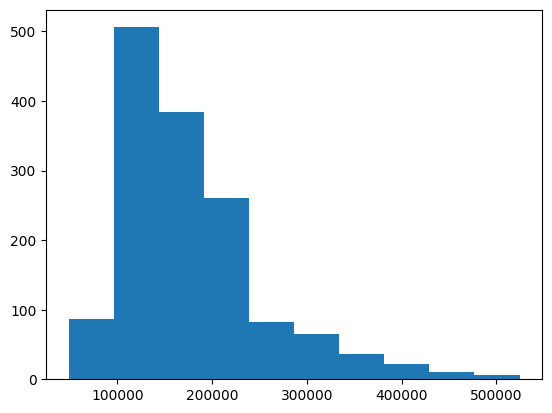

In [49]:
plt.hist(y_pred)

In [50]:
housing_test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

In [51]:
housing_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [52]:
output = pd.DataFrame({'Id': housing_test["Id"], 'SalePrice': y_pred[:,0]})

In [53]:
output

,Id,SalePrice
0,1461,118157.111910
1,1462,144992.545857
2,1463,187187.859048
3,1464,198784.513721
4,1465,186766.619012
...,...,...
1454,2915,78568.101918
1455,2916,81776.500603
1456,2917,146843.737989
1457,2918,112877.793578


In [54]:
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
